In [22]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

SEED = 1

# Fix numpy seed for reproducibility
np.random.seed(SEED)
print("begin")


begin


In [55]:
 # Synthetic data parameters
num_dimension = 100
num_row = 12000
c = 0.3
rho = 0.8 #correlation score
m = 5
mu1 = np.random.normal(size=num_dimension)
mu1 = (mu1 - np.mean(mu1)) / (np.std(mu1) * np.sqrt(num_dimension))
mu2 = np.random.normal(size=num_dimension)
mu2 -= mu2.dot(mu1) * mu1
mu2 /= np.linalg.norm(mu2)
w1 = c * mu1
w2 = c * (rho * mu1 + np.sqrt(1. - rho ** 2) * mu2)

alpha = np.random.normal(size=m)
beta = np.random.normal(size=m)
y0 = []
y1 = []
X = []

num_row = 1000
for i in range(num_row):
        x = np.random.normal(size=num_dimension)
        X.append(x)
        num1 = w1.dot(x)
        num2 = w2.dot(x)
        comp1, comp2 = 0.0, 0.0

        for j in range(m):
            comp1 += np.sin(alpha[j] * num1 + beta[j])
            comp2 += np.sin(alpha[j] * num2 + beta[j])

        y0.append(num1 + comp1 + np.random.normal(scale=0.01, size=1))
        y1.append(num2 + comp2 + np.random.normal(scale=0.01, size=1))




In [68]:
#确认二范数=1
print(np.linalg.norm(mu1))
#确认mu1和mu2正交
print(sum(mu1.T * mu2))
#计算w1和w2 consine系数
d1=np.dot(w1,w2)/(np.linalg.norm(w1)*np.linalg.norm(w2))
print(d1)


1.0
-3.469446951953614e-18
0.8000000000000002
0.9922788215280649


In [69]:
y0_arr = np.array(y0).flatten()
y1_arr = np.array(y1).flatten()

print(y0_arr.shape)
print(y0_arr.flatten().shape)

#计算y0和y1 consine系数
d2=np.dot(y0_arr,y1_arr)/(np.linalg.norm(y0_arr)*np.linalg.norm(y1_arr))
print(d2)

(1000,)
(1000,)
0.9922788215280649


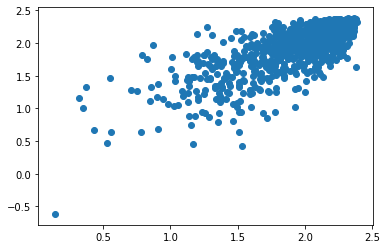

In [76]:
# 画出y0和y1的散点图
plt.scatter(y0_arr,y1_arr)
plt.show()

In [49]:
#画出mu1的形状
len(mu1.tolist())

100

In [36]:
x = np.arange(0,100)
x.shape

(100,)

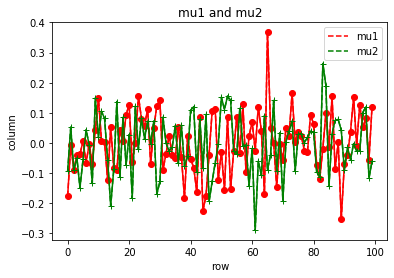

In [45]:
l1 = plt.plot(x, mu1, 'r--', label ='mu1')
l2 = plt.plot(x, mu2, 'g--', label ='mu2')
plt.plot(x,mu1,'ro-',x,mu2,'g+-')
plt.title('mu1 and mu2')
plt.xlabel('row')
plt.ylabel('column')
plt.legend()
plt.show()

In [102]:
np.random.seed(None)
alpha = np.random.normal(size=5)
alpha


array([ 1.17707986,  1.00232318, -1.31407374,  0.26167556, -0.67408186])

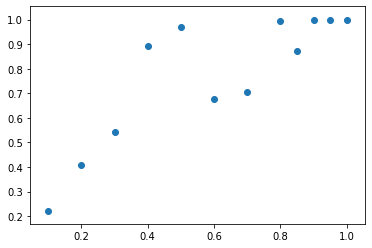

In [93]:
 # Synthetic data parameters
num_dimension = 100
num_row = 12000
c = 0.3
m = 5
rhos = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.85, 0.9,0.95, 1.0] #correlation score

w_ps = []
l_ps= []
for rho in rhos:
    mu1 = np.random.normal(size=num_dimension)
    mu1 = (mu1 - np.mean(mu1)) / (np.std(mu1) * np.sqrt(num_dimension))
    mu2 = np.random.normal(size=num_dimension)
    mu2 -= mu2.dot(mu1) * mu1
    mu2 /= np.linalg.norm(mu2)
    w1 = c * mu1
    w2 = c * (rho * mu1 + np.sqrt(1. - rho ** 2) * mu2)

    d1=np.dot(w1,w2)/(np.linalg.norm(w1)*np.linalg.norm(w2))
    w_ps.append(d1)

    alpha = np.random.normal(size=m)
    beta = np.random.normal(size=m)
    y0 = []
    y1 = []
    X = []

    for i in range(num_row):
        x = np.random.normal(size=num_dimension)
        X.append(x)
        num1 = w1.dot(x)
        num2 = w2.dot(x)
        comp1, comp2 = 0.0, 0.0

        for j in range(m):
            comp1 += np.sin(alpha[j] * num1 + beta[j])
            comp2 += np.sin(alpha[j] * num2 + beta[j])

        y0.append(num1 + comp1 + np.random.normal(scale=0.01, size=1))
        y1.append(num2 + comp2 + np.random.normal(scale=0.01, size=1))

    y0_arr = np.array(y0).flatten()
    y1_arr = np.array(y1).flatten()

    #计算y0和y1 consine系数
    d2=np.dot(y0_arr,y1_arr)/(np.linalg.norm(y0_arr)*np.linalg.norm(y1_arr))
    l_ps.append(d2)

# 画出y0和y1的散点图
plt.scatter(w_ps,l_ps)
plt.show() 

In [105]:
 # Synthetic data parameters
num_dimension = 100
num_row = 12000
c = 0.3
rho = 0.99 #correlation score
m = 5

SEED = 1
# Fix numpy seed for reproducibility
np.random.seed(SEED)

mu1 = np.random.normal(size=num_dimension)
mu1 = (mu1 - np.mean(mu1)) / (np.std(mu1) * np.sqrt(num_dimension))

SEED += 1
np.random.seed(SEED)
mu2 = np.random.normal(size=num_dimension)
mu2 -= mu2.dot(mu1) * mu1
mu2 /= np.linalg.norm(mu2)

SEED += 1
np.random.seed(SEED)
mu3 = np.random.normal(size=num_dimension)
mu3 -= mu3.dot(mu1) * mu1
mu3 /= np.linalg.norm(mu3)


w1 = c * mu1
w2 = c * (rho * mu1 + np.sqrt(1. - rho ** 2) * mu2)
w3 = c * (rho * mu1 + np.sqrt(1. - rho ** 2) * mu3)
d12=np.dot(w1,w2)/(np.linalg.norm(w1)*np.linalg.norm(w2))
d13=np.dot(w1,w3)/(np.linalg.norm(w1)*np.linalg.norm(w3))
d23=np.dot(w2,w3)/(np.linalg.norm(w2)*np.linalg.norm(w3))

print("d12:" + str(d12))
print("d13:" + str(d13))
print("d23:" + str(d23))

SEED += 1
np.random.seed(SEED)
alpha = np.random.normal(size=m)

SEED += 1
np.random.seed(SEED)
beta = np.random.normal(size=m)
y0 = []
y1 = []
y2 = []
X = []

num_row = 1000
for i in range(num_row):

        SEED += 1
        np.random.seed(SEED)    
        x = np.random.normal(size=num_dimension)

        X.append(x)
        num1 = w1.dot(x)
        num2 = w2.dot(x)
        num3 = w3.dot(x)

        comp1, comp2, comp3 = 0.0, 0.0, 0.0

        for j in range(m):
            comp1 += np.sin(alpha[j] * num1 + beta[j])
            comp2 += np.sin(alpha[j] * num2 + beta[j])
            comp3 += np.sin(alpha[j] * num3 + beta[j])

        SEED += 1
        np.random.seed(SEED)
        y0.append(num1 + comp1 + np.random.normal(scale=0.01, size=1))

        SEED += 1
        np.random.seed(SEED)
        y1.append(num2 + comp2 + np.random.normal(scale=0.01, size=1))

        SEED += 1
        np.random.seed(SEED)
        y2.append(num3 + comp3 + np.random.normal(scale=0.01, size=1))

y0_arr = np.array(y0).flatten()
y1_arr = np.array(y1).flatten()
y2_arr = np.array(y2).flatten()

#计算y0和y1 consine系数
dy01=np.dot(y0_arr,y1_arr)/(np.linalg.norm(y0_arr)*np.linalg.norm(y1_arr))
dy02=np.dot(y0_arr,y2_arr)/(np.linalg.norm(y0_arr)*np.linalg.norm(y2_arr))
dy12=np.dot(y1_arr,y2_arr)/(np.linalg.norm(y1_arr)*np.linalg.norm(y2_arr))

print("dy01:" + str(dy01))
print("dy02:" + str(dy02))
print("dy12:" + str(dy12))

d12:0.99
d13:0.99
d23:0.9795310153289271
dy01:0.9933977898337809
dy02:0.993112075096009
dy12:0.9866455367525522


In [2]:
def data_preparation():
    # Synthetic data parameters
    num_dimension = 100
    num_row = 12000
    c = 0.3
    rho = 0.8 
    m = 5

    # Initialize vectors u1, u2, w1, and w2 according to the paper
    mu1 = np.random.normal(size=num_dimension)
    mu1 = (mu1 - np.mean(mu1)) / (np.std(mu1) * np.sqrt(num_dimension))
    mu2 = np.random.normal(size=num_dimension)
    mu2 -= mu2.dot(mu1) * mu1
    mu2 /= np.linalg.norm(mu2)
    w1 = c * mu1
    w2 = c * (rho * mu1 + np.sqrt(1. - rho ** 2) * mu2)

    # Feature and label generation
    alpha = np.random.normal(size=m)
    beta = np.random.normal(size=m)
    y0 = []
    y1 = []
    X = []

    for i in range(num_row):
        x = np.random.normal(size=num_dimension)
        X.append(x)
        num1 = w1.dot(x)
        num2 = w2.dot(x)
        comp1, comp2 = 0.0, 0.0

        for j in range(m):
            comp1 += np.sin(alpha[j] * num1 + beta[j])
            comp2 += np.sin(alpha[j] * num2 + beta[j])

        y0.append(num1 + comp1 + np.random.normal(scale=0.1, size=1))
        y1.append(num2 + comp2 + np.random.normal(scale=0.1, size=1))

    X = np.array(X)
    data = pd.DataFrame(
        data=X,
        index=range(X.shape[0]),
        columns=['x{}'.format(it) for it in range(X.shape[1])]
    )

    train_data = data.iloc[0:10000]
    train_label = [y0[0:10000], y1[0:10000]]
    validation_data = data.iloc[10000:11000]
    validation_label = [y0[10000:11000], y1[10000:11000]]
    test_data = data.iloc[11000:]
    test_label = [y0[11000:], y1[11000:]]

    return train_data, train_label, validation_data, validation_label, test_data, test_label

In [13]:
train_data, train_label, validation_data, validation_label, test_data, test_label = data_preparation()
num_features = train_data.shape[1]

print('Training data shape = {}'.format(train_data.shape))
print('Validation data shape = {}'.format(validation_data.shape))
print('Test data shape = {}'.format(test_data.shape))

print('Training label shape = {}'.format(len(train_label)))
print('Validation label shape = {}'.format(len(validation_label)))
print('Test label shape = {}'.format(len(test_label)))

Training data shape = (10000, 100)
Validation data shape = (1000, 100)
Test data shape = (1000, 100)
Training label shape = 2
Validation label shape = 2
Test label shape = 2


In [16]:
len(train_label[0])

10000

In [4]:
num_features

100

In [7]:
train_data.head(10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,-0.326499,-1.342676,1.114383,-0.586524,-1.236853,0.875839,0.623362,-0.434957,1.407540,0.129102,...,2.065783,-1.471157,-0.830172,-0.880578,-0.279098,1.622849,0.013353,-0.694694,0.621804,-0.599805
1,1.388779,-0.661344,3.030857,0.824585,0.654580,-0.051188,-0.725597,-0.867769,-0.135977,-0.797270,...,0.367232,1.232899,-0.422857,0.086464,-2.142467,-0.830169,0.451616,1.104174,-0.281736,2.056356
2,-2.413503,-1.777566,-0.777859,1.115841,0.310272,-2.094248,-0.228766,1.613361,-0.374805,-0.749970,...,-0.258983,0.189293,-0.563789,0.089686,-0.601157,0.556074,1.693809,0.196870,0.169869,-1.164008
3,-0.808847,0.557439,0.181039,1.107175,1.442877,-0.539682,0.128377,1.760415,0.966539,0.713049,...,0.351117,-0.068770,-1.347765,1.470740,0.337221,1.008065,0.785227,-0.664868,-1.945047,-0.915424
4,0.816044,-0.612407,0.393109,-1.823920,1.167075,-0.039669,0.885826,0.189862,0.798064,-0.101932,...,-0.362612,-1.485156,-0.592461,-2.304908,-0.031817,0.112488,0.288078,1.498108,-0.300976,0.807456
5,-2.076802,0.947501,-0.503974,0.017956,-1.270461,0.282996,0.108031,0.029418,-0.134793,1.049218,...,-0.569149,-1.061797,0.132248,-0.563237,2.390146,0.245423,1.152599,-0.224236,-0.326061,-0.030911
6,-0.122154,-0.680852,-1.067877,-0.076679,0.572963,0.457947,-0.017818,-0.600139,0.146765,0.571805,...,-1.045534,0.355285,0.755392,0.700982,-0.198937,0.301960,-0.394690,-1.171813,0.984012,-0.559681
7,-0.892647,-0.161198,-0.286385,-0.870888,0.501430,-0.478614,1.631692,0.860891,-0.880189,-0.019001,...,1.566686,-0.237748,0.558803,-1.504891,-1.943922,-1.174024,-0.357188,-0.521376,-0.230114,-0.491014
8,0.036197,2.029997,-0.634405,-0.525103,0.387735,-0.354799,1.177052,-0.641108,1.322694,0.194175,...,-2.308039,0.327068,-0.379120,1.797919,-0.691269,1.142564,-2.514925,0.814625,0.276103,-0.247016
9,0.423003,-0.134249,-1.787738,-0.185811,2.234722,0.046846,0.290788,-0.438055,0.174054,0.177946,...,0.876200,0.123255,-0.397126,0.886090,0.318972,0.264868,1.040038,0.573265,-0.108898,0.937555


In [ ]:
#查看两个label间的相关关系

In [10]:
device = torch.device("cpu")

In [ ]:
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=4, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=4, shuffle=False)